- En el presente análisis, se abordarán aspectos relevantes relacionados con los Precios, Costos,Velocidad y Eficiencia de los Vehículos Eléctricos.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
car_electric = pd.read_csv ('ElectricCarData_Clean_Me.csv')

In [4]:
car_electric.isnull().sum()

Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
dtype: int64

In [5]:
# Creo un nuevo dataframe con las columnas que me interesan
# Y ademas hago otros dataframes para los autos que cuestan menos de 50,000 Euros y los que cuestan mas de 50,000.
# Tambien creo dos titulos para los graficos que voy a hacer. 't1' y 't2'
car_electric['FullName'] = car_electric['Brand'] + '-' + car_electric['Model']
df_1 = car_electric.loc[car_electric['PriceEuro'] <= 50000]
df_2 = car_electric.loc[car_electric['PriceEuro'] > 50000]
t1 = 'Autos menor de 50,000 Euros' 
t2 = 'Autos mayor de 50,000 Euros'

* Funciones y Visualizaciones

In [6]:
# Grafico de recuento para el Powertrain ( Motor eléctrico, e inversor, y la batería. )
def power_train(car_electric): 
    sns.countplot(x= car_electric['PowerTrain'], edgecolor='black')
    plt.title('Powertrain', fontsize = 20)
    plt.xlabel('Power Train', fontsize = 15)
    plt.ylabel('Cuenta', fontsize = 15)

In [7]:
# Grafico del estilo de carroceria.
def bodystyle(car_electric):
    plt.figure(figsize=(10, 5))
    sns.countplot(x= 'BodyStyle', data= car_electric, hue='PowerTrain', edgecolor='black')
    plt.title('Body Style', fontsize= 20)
    plt.xlabel('Body Style', fontsize= 15)
    plt.ylabel('Cuenta', fontsize= 15)
    plt.show()

In [27]:
# Grafico de la autonomia de los autos que cuestan menos de 50,000 Euros.
def range(car_electric, price):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot('FullName', 'Range_Km' , data = car_electric, hue = car_electric['PowerTrain'], edgecolor='black')
  plt.title('''Autonomía (km) de vehículos eléctricos{} '''.format(price), fontsize = 20)
  plt.ylabel('Rango (Km)', fontsize= 15)
  plt.xlabel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()

In [28]:
# Grafico del rango de la bateria de los autos.
def range_batterypack(car_electric, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(car_electric['FullName'], car_electric['Range_Km'],label= 'Range (Km)', color= 'steelblue', edgecolor='black')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.105))
  ax2 = ax1.twinx()
  ax2.scatter(car_electric['FullName'], car_electric['Battery_Pack Kwh'], label= 'Battery Pack', color = 'black')
  plt.title('''RANGO (Km) CAPACIDAD DE BATERIA (KwH) {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Rango (Km)', color = 'steelblue', size = 20)
  ax2.set_ylabel('Capacidad de Bateria (Kwh)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

In [29]:
# Funcion y grafico para graficar la aceleracion de los autos.
def acc(dataframe, text):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot(x='FullName', y='AccelSec', data = dataframe, hue = 'PowerTrain', edgecolor='black')
  plt.title('''Aceleracion 0-100 Km Autos Electricos {}'''.format(text), fontsize= 20)
  plt.ylabel('Acceleracion(segundos)')
  plt.xlabel('Model')
  plt.xticks(rotation = 90)
  plt.show()

In [30]:
#Funcion y grafico para el costo de los autos.
def range_price(car_electric, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(car_electric['FullName'], car_electric['Range_Km'],label= 'Range (Km)', color= 'steelblue', edgecolor='black')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
  ax2 = ax1.twinx()
  ax2.scatter(car_electric['FullName'], car_electric['PriceEuro'], label= 'Price', color = 'black')
  plt.title('''RANGO DE (Km) PRECIO (Euros)AUTOS ELECTRICOS{}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Rango (Km)', color = 'steelblue', size = 20)
  ax2.set_ylabel('Precio (Euros)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

In [31]:
# Funcion y grafico para la eficiencia de los autos.
def range_efficiency(car_electric, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(car_electric['FullName'], car_electric['Range_Km'],label= 'Range (Km)', color= 'darkseagreen', edgecolor='black')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
  ax2 = ax1.twinx()
  ax2.scatter(car_electric['FullName'], car_electric['Efficiency_WhKm'], label= 'Price', color = 'black')
  plt.title('''RANGO EN (Km)EFICIENCIA (Wh/km)Autos Electricos con Costos {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Rango en (Km)', color = 'darkseagreen', size = 20)
  ax2.set_ylabel('Eficiencia (Wh/Km)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

In [13]:
# Funcion y grafico para la capacidad de carga de los autos.
def fastcharge(car_electric, price):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot(x='FullName', y='FastCharge_KmH', data = car_electric, hue = 'FastCharge_KmH', edgecolor='black')

  plt.title('''Carga Electrica de los Autos Electricos {} '''.format(price), fontsize = 20)
  plt.ylabel('Capacidad de Carga (kmH)', fontsize= 15)
  plt.xlabel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()

* Visualizacion de todas las Funciones y graficos.

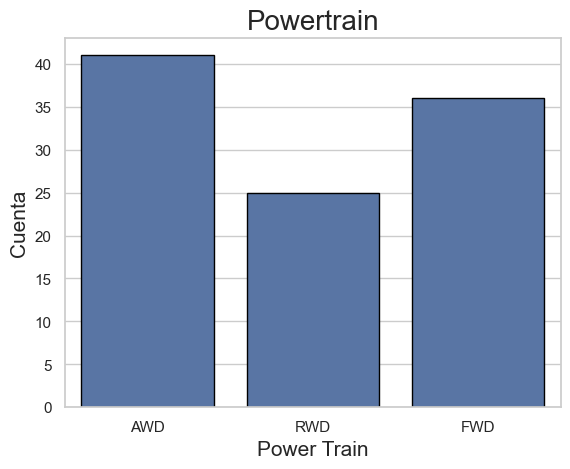

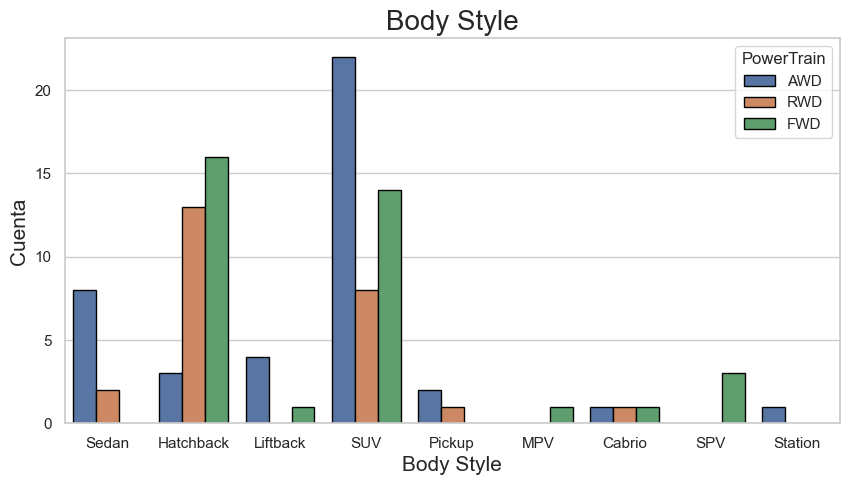

In [32]:
# Cuenta de los Power Train
power_train(car_electric)
bodystyle(car_electric)

- AWD - All-Wheel Drive (Tracción en las Cuatro Ruedas)
- RWD - Rear-Wheel Drive (Tracción Trasera)
- FWD - Front-Wheel Drive (Tracción Delantera)

* Graficos de precios de los Autos Electricos menor y mayor de $50,000

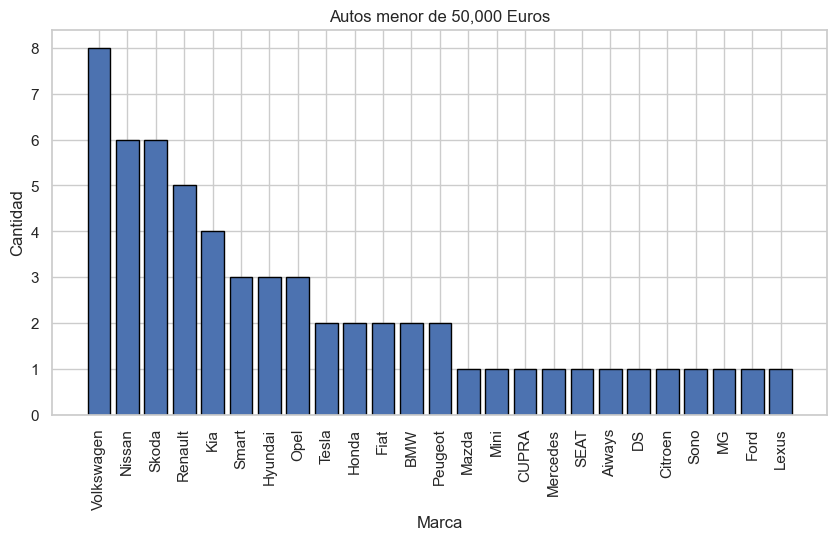

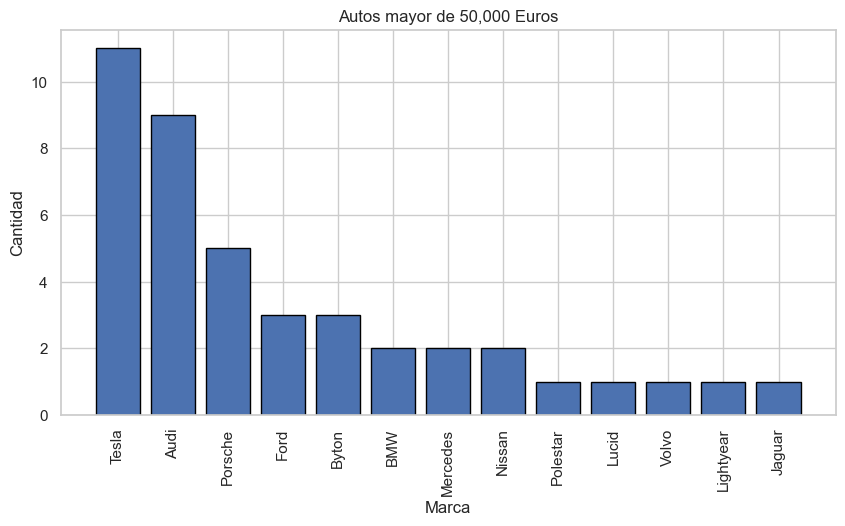

In [34]:
# Agrupar los datos por marca y contar la cantidad de autos en cada grupo
menor_precio_autos = df_1['Brand'].value_counts()
mayor_precio_autos = df_2['Brand'].value_counts()

# Crear un gráfico de barras para los autos que valen menos de 50,000 euros
plt.figure(figsize=(10, 5))
plt.bar(menor_precio_autos.index, menor_precio_autos.values, edgecolor='black')
plt.title(t1)
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

# Crear un gráfico de barras para los autos que valen más de 50,000 euros
plt.figure(figsize=(10, 5))
plt.bar(mayor_precio_autos.index, mayor_precio_autos.values, edgecolor='black')
plt.title(t2)
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_18224\360772097.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


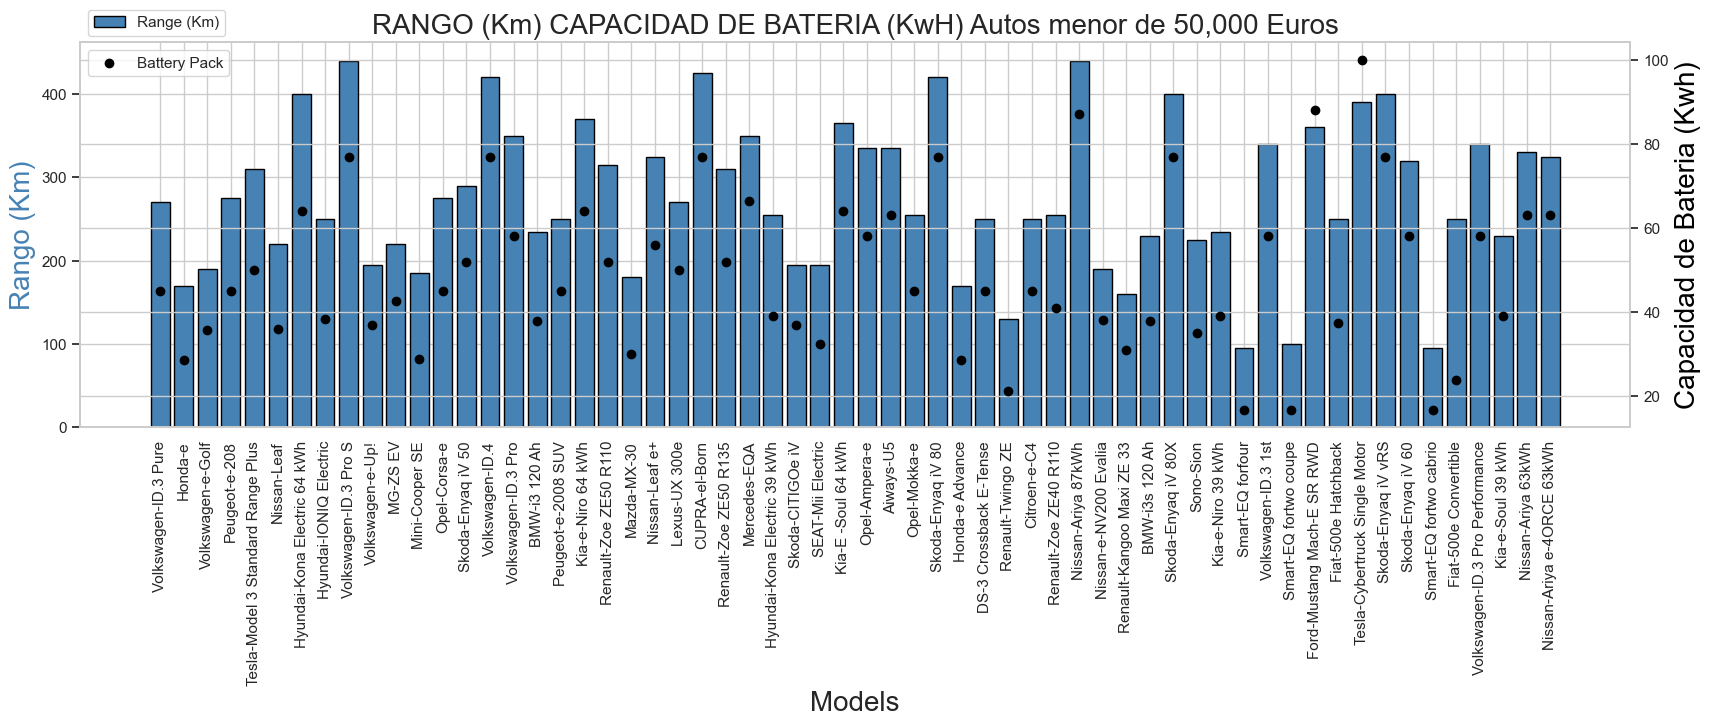

C:\Users\DELL\AppData\Local\Temp\ipykernel_18224\360772097.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


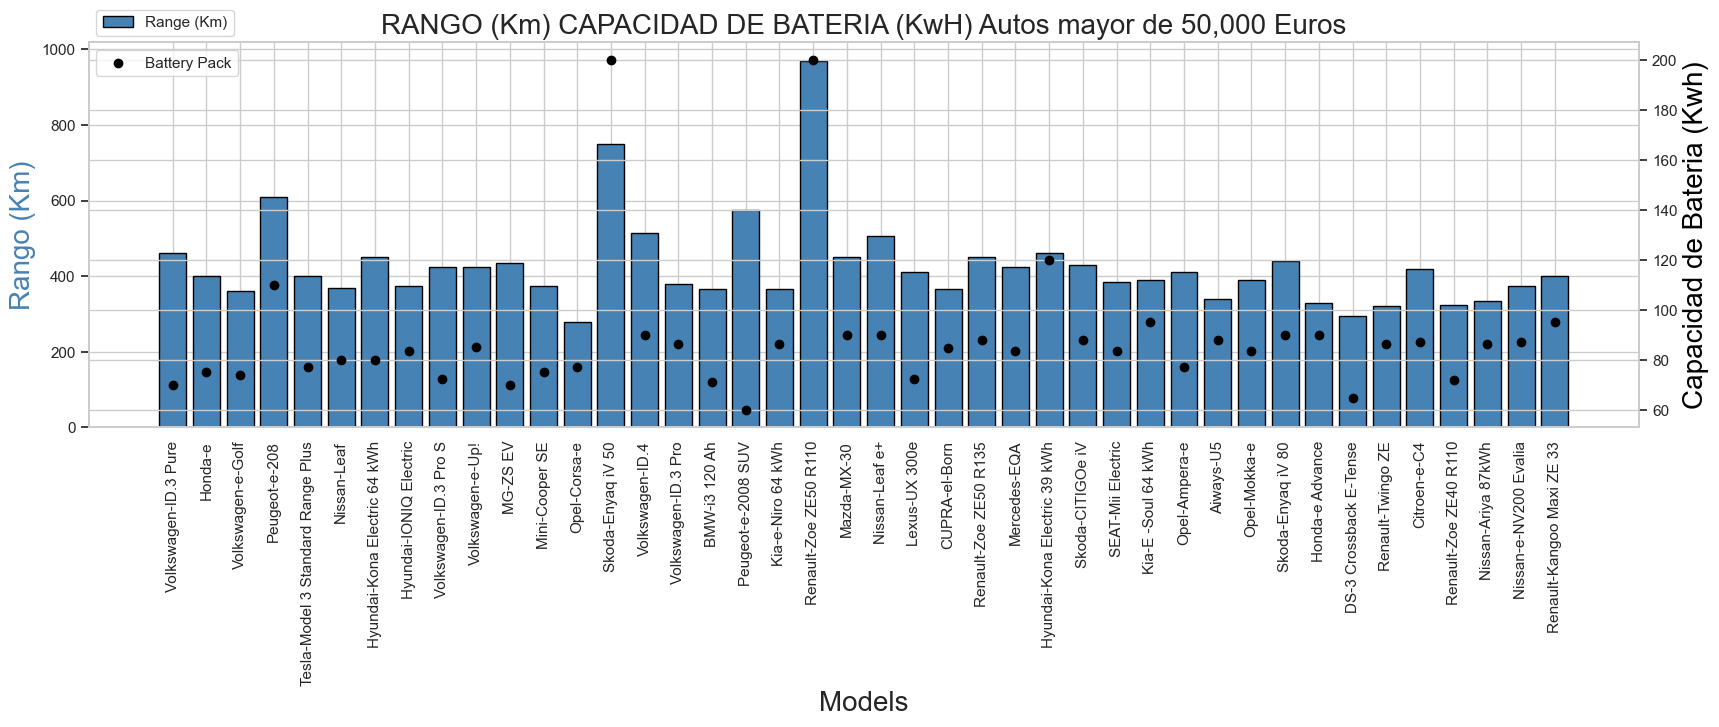

In [35]:
range_batterypack(df_1, t1)
range_batterypack(df_2, t2)

* Graficos de Aceleracion de los Autos Electricos.

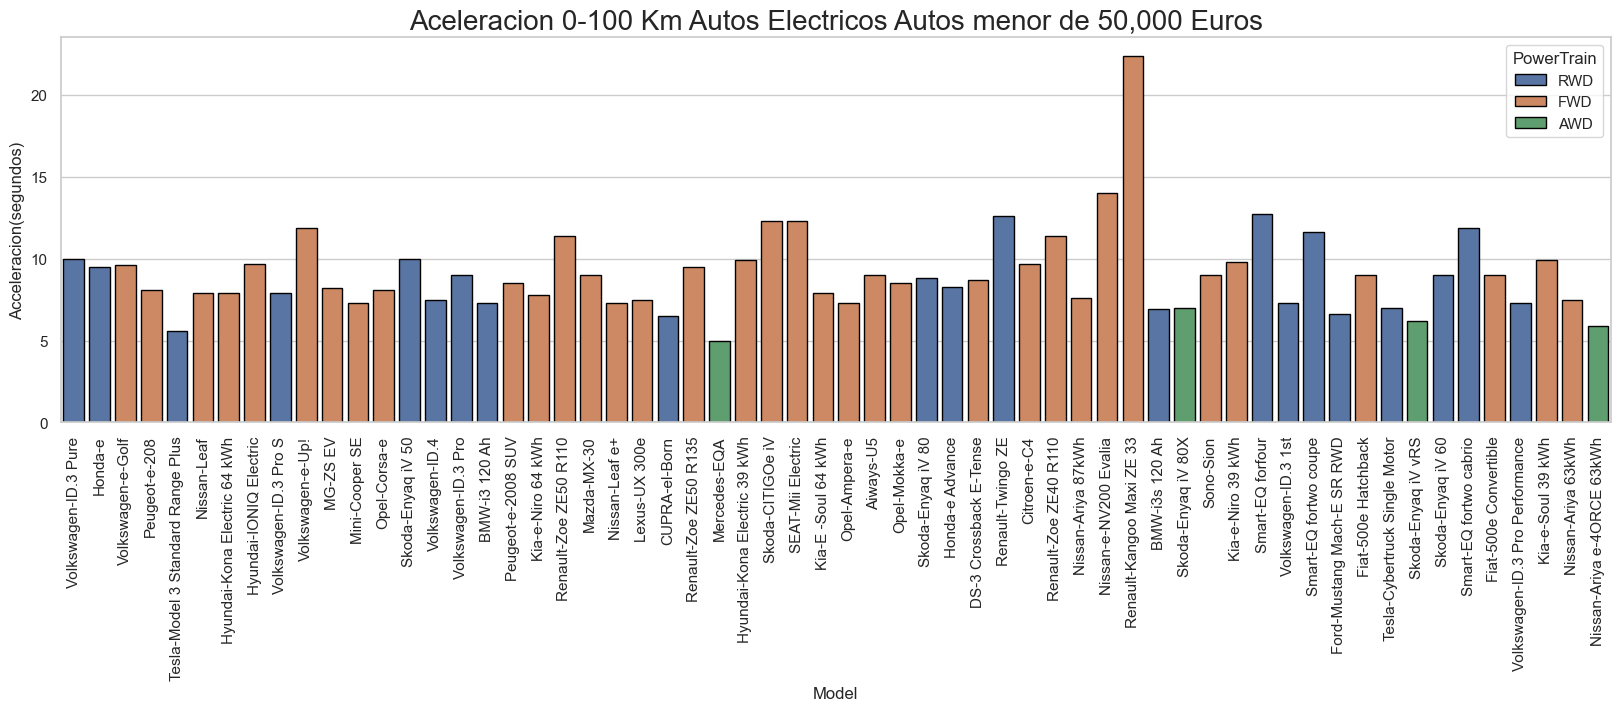

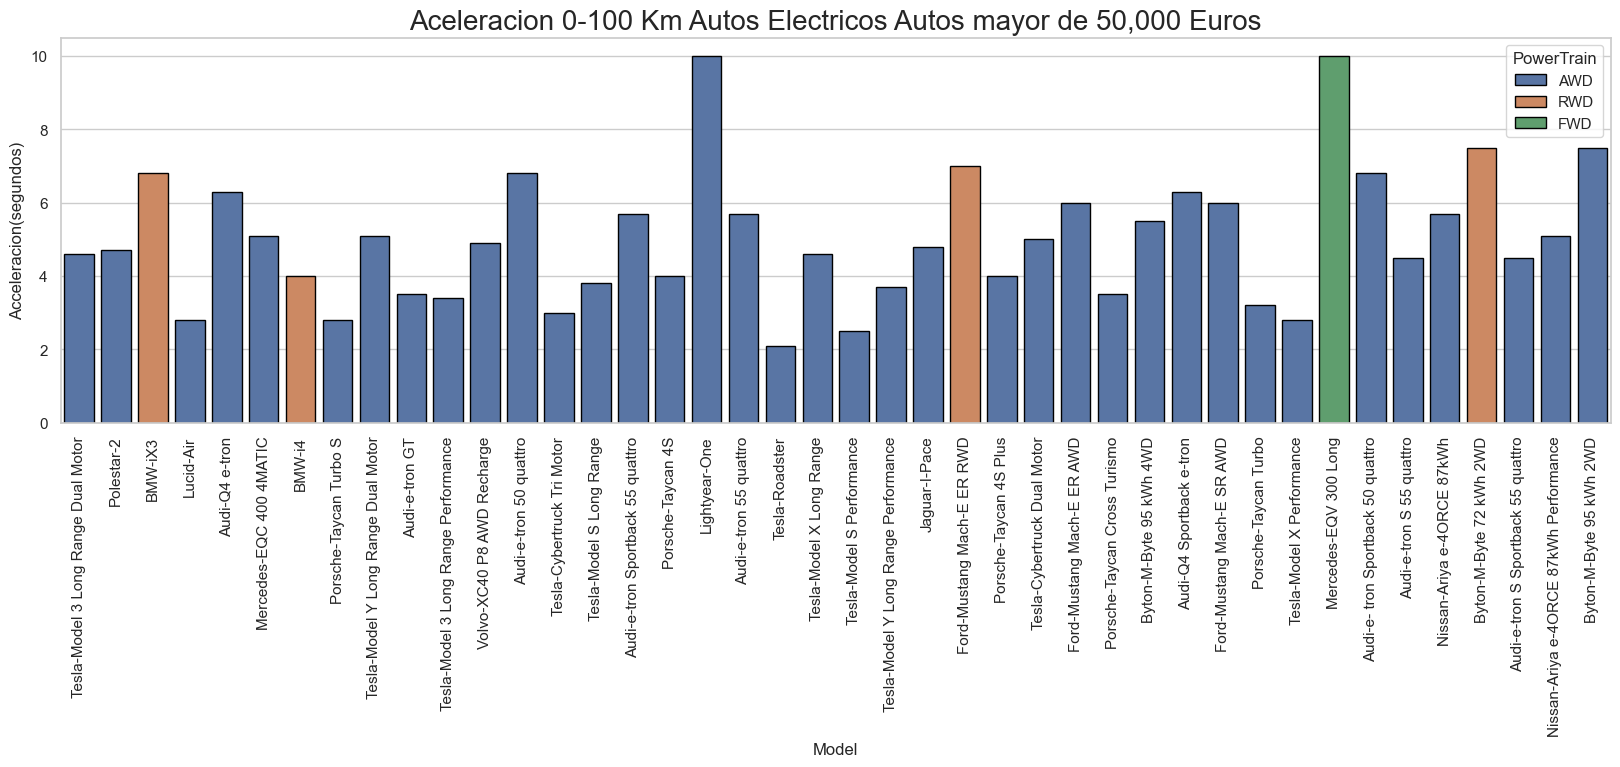

In [36]:
# Acerleracion de los autos 
acc(df_1, t1)
acc(df_2, t2)

Rango de Precios de los Autos Electricos

C:\Users\DELL\AppData\Local\Temp\ipykernel_18224\1271692822.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


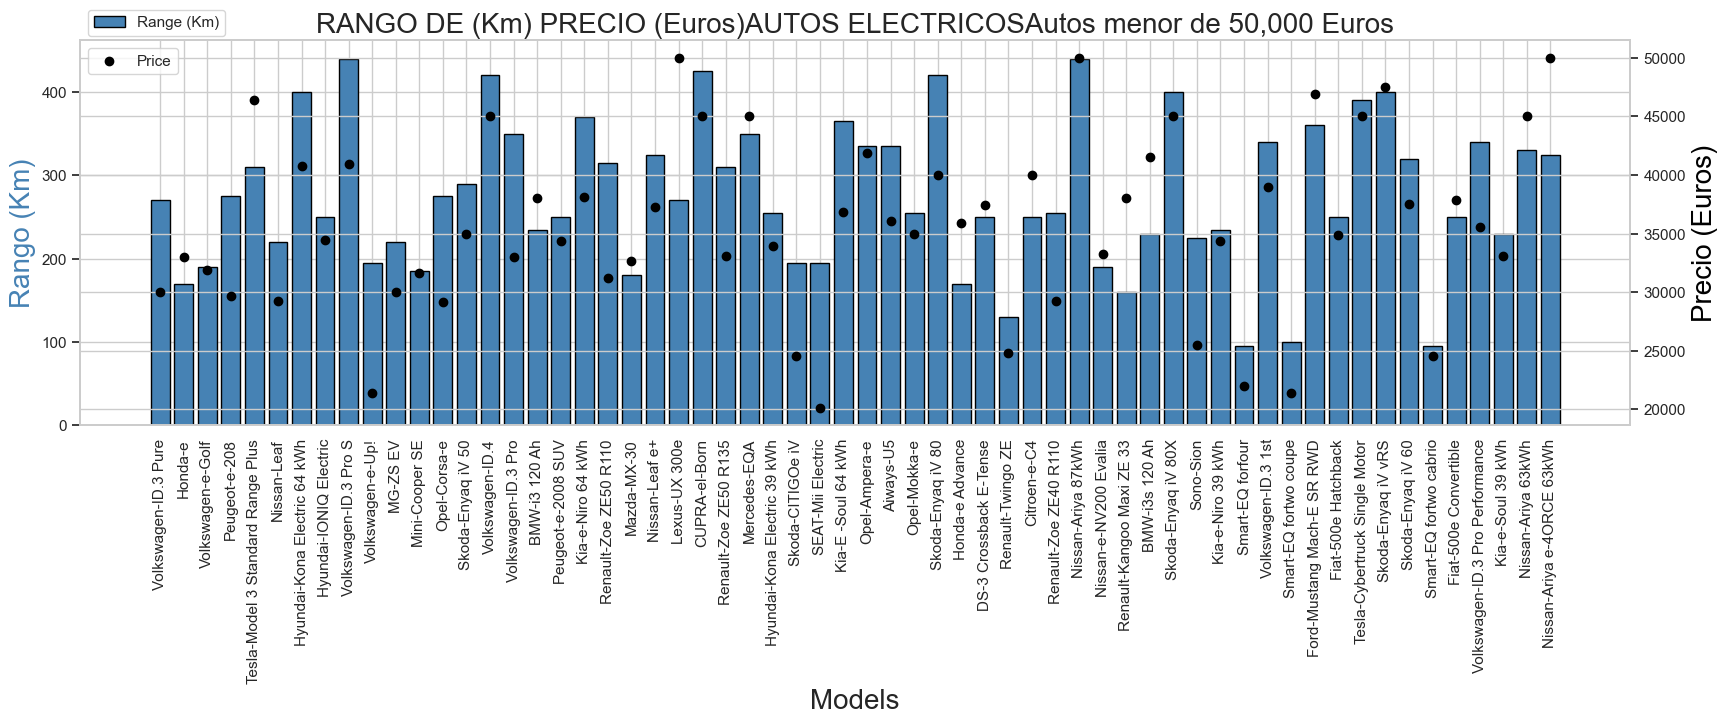

C:\Users\DELL\AppData\Local\Temp\ipykernel_18224\1271692822.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


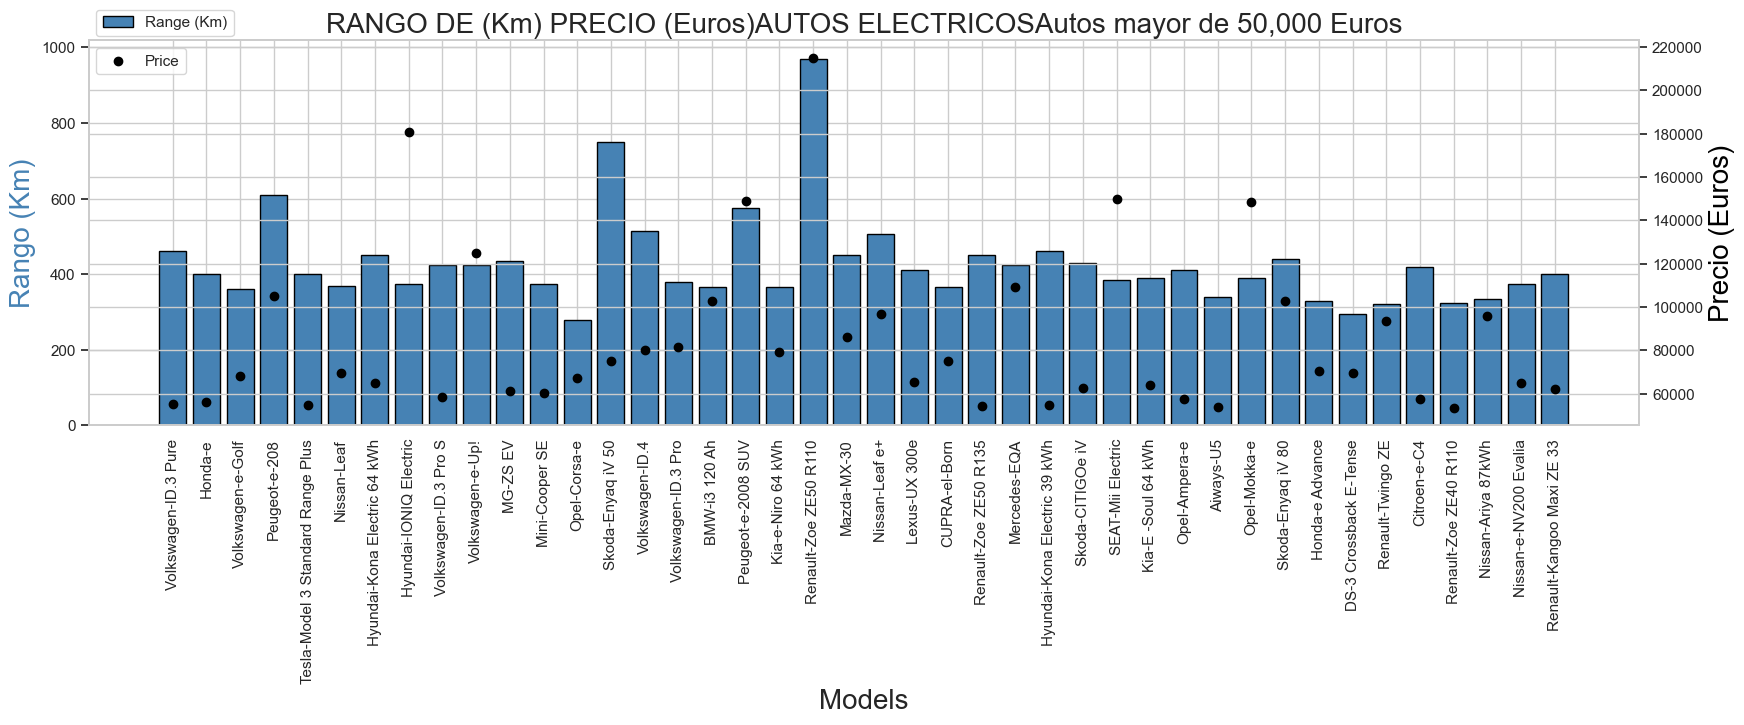

In [37]:
# price vs acceleration
range_price(df_1, t1)
range_price(df_2, t2)

* La Eficiencia de Autos Electricos.

C:\Users\DELL\AppData\Local\Temp\ipykernel_18224\3222830457.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


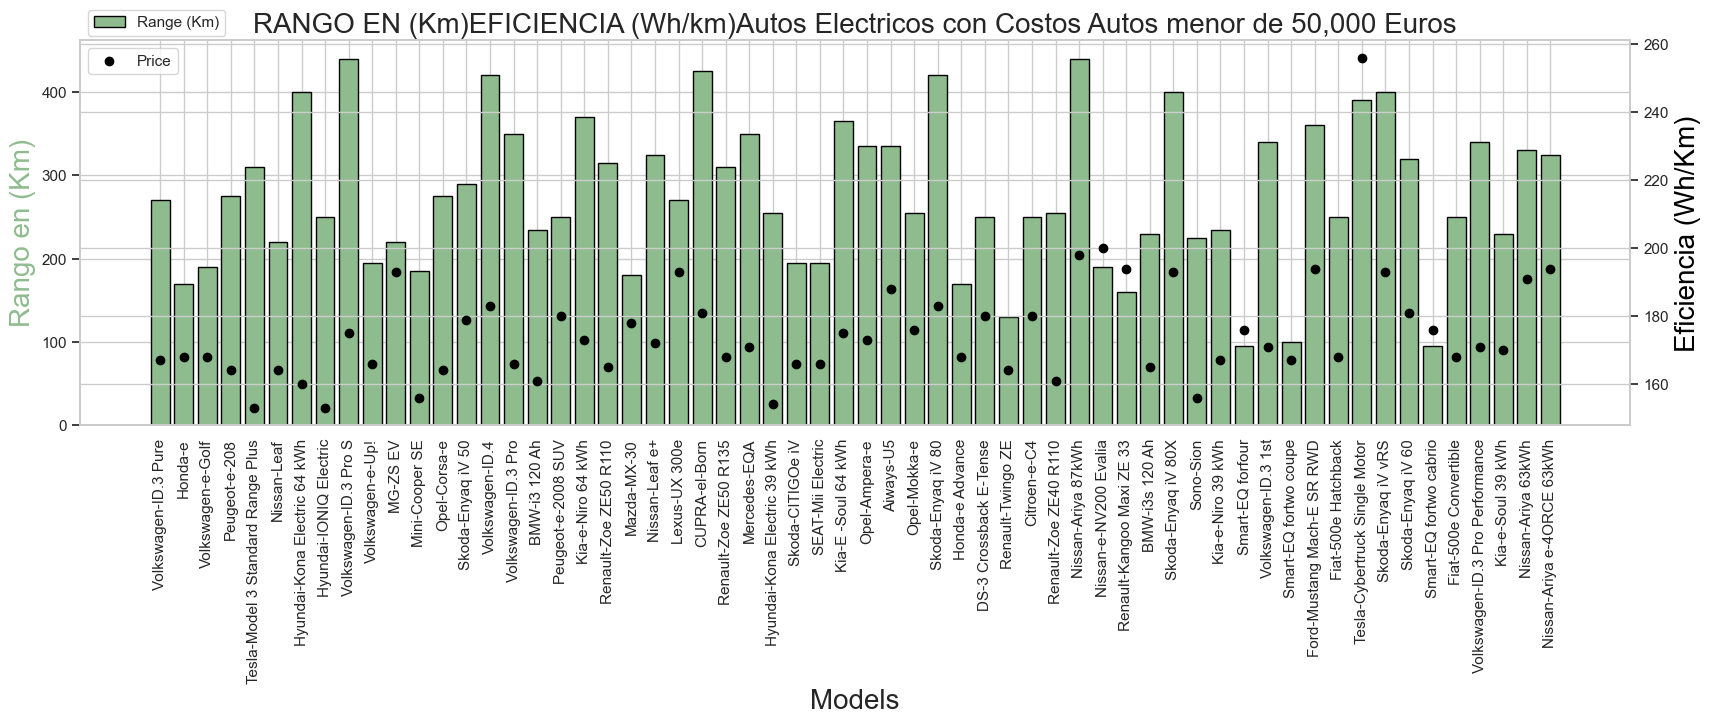

C:\Users\DELL\AppData\Local\Temp\ipykernel_18224\3222830457.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


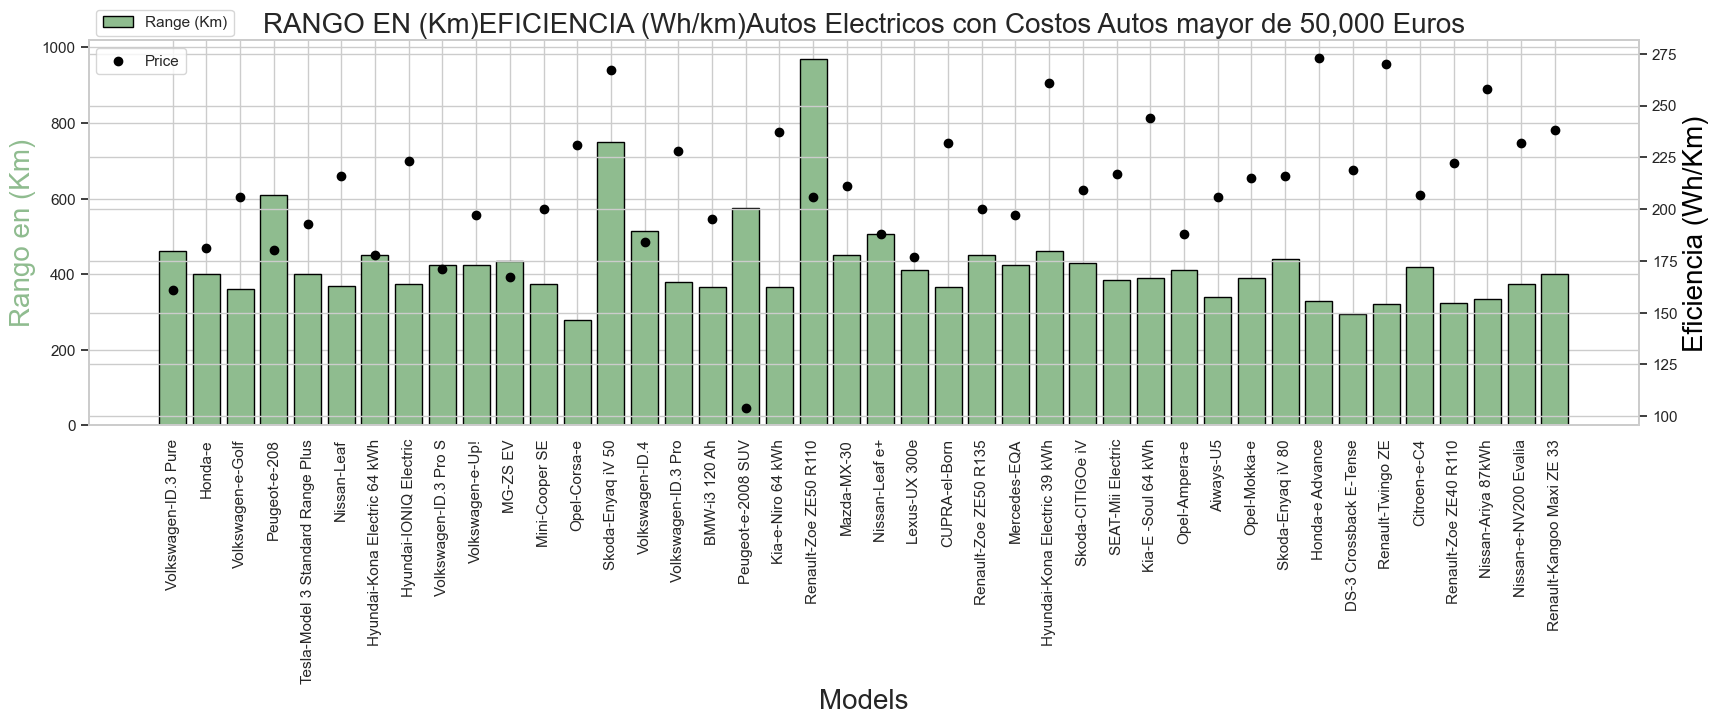

In [38]:
# Eficiencia vs Rango
range_efficiency(df_1, t1)
range_efficiency(df_2, t2)

* Carga Electrica para Autos Electricos

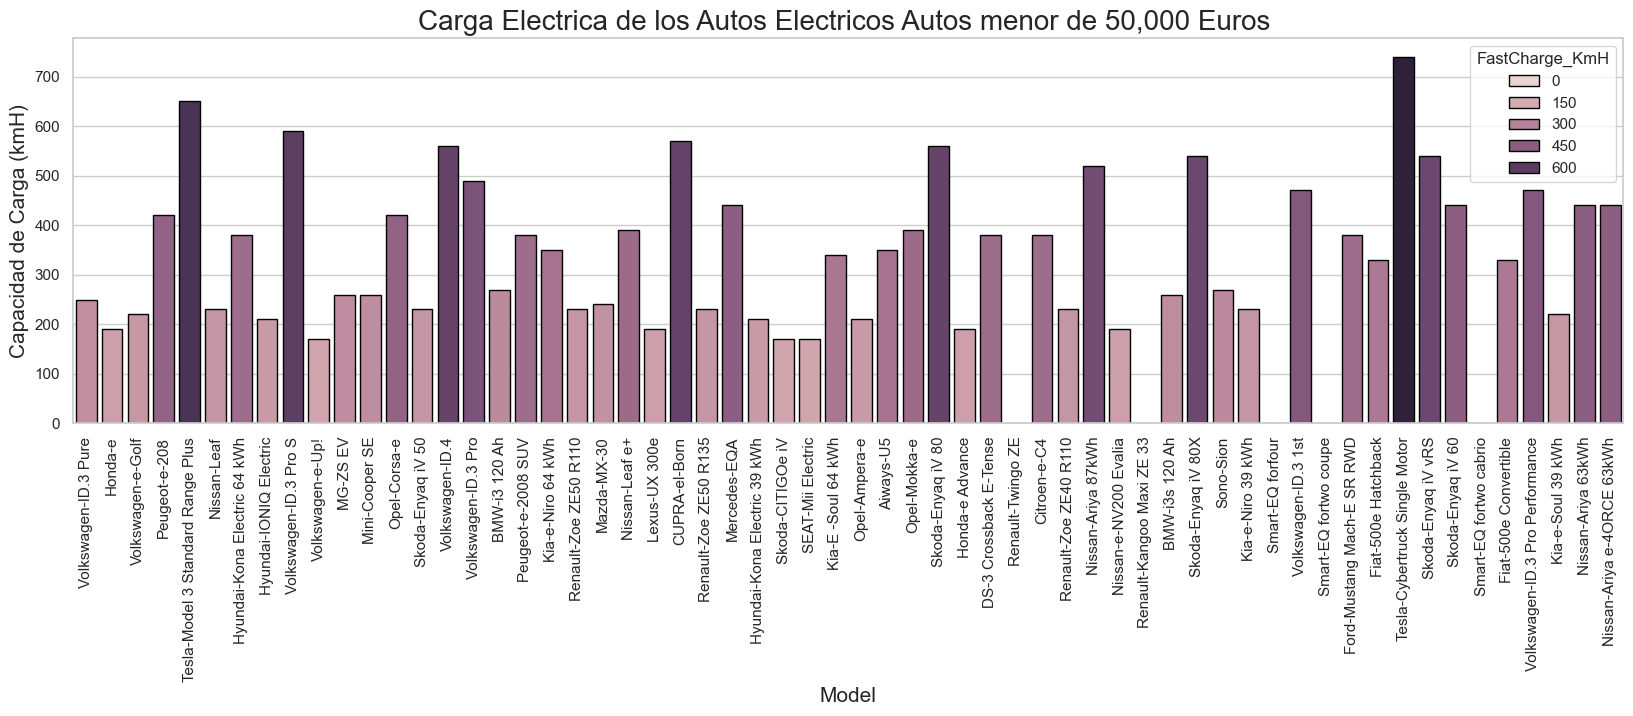

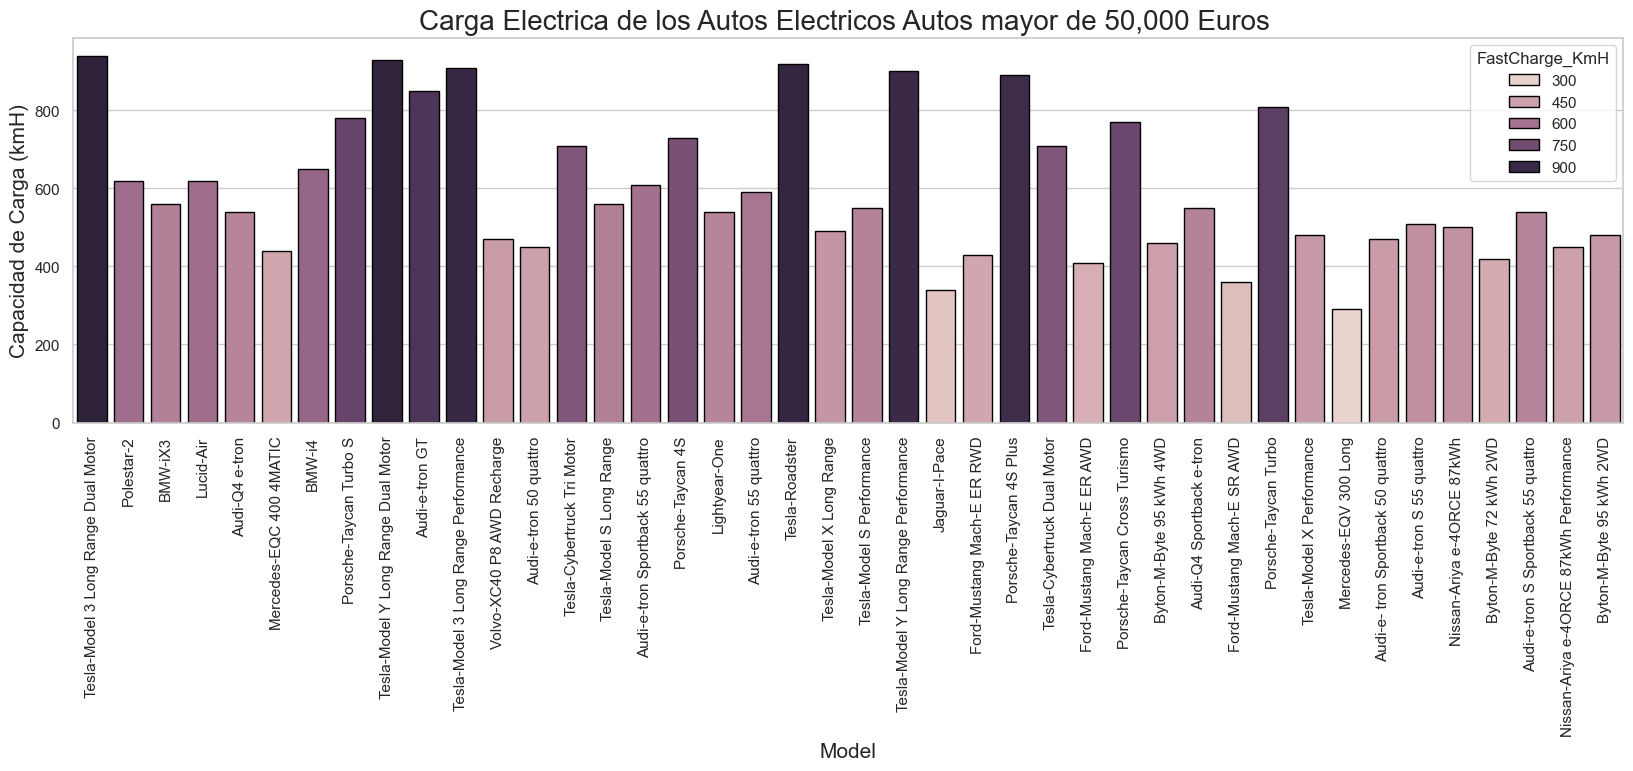

In [39]:
# Carga Rapida
fastcharge(df_1, t1)
fastcharge(df_2, t2)

* Algunas Preguntas :<br>
¿Qué auto tiene una autonomía máxima (km) inferior a 50.000 euros?

In [40]:
pd.set_option('display.max_columns', None)
autonomia_maxima_km = df_1.sort_values(by= 'Range_Km', ascending= False)
autonomia_maxima_km[['FullName', 'Range_Km', 'Battery_Pack Kwh' ,'PriceEuro', 'RapidCharge']]

,FullName,Range_Km,Battery_Pack Kwh,PriceEuro,RapidCharge
62,Nissan-Ariya 87kWh,440,87.0,50000,Yes
15,Volkswagen-ID.3 Pro S,440,77.0,40936,Yes
37,CUPRA-el-Born,425,77.0,45000,Yes
25,Volkswagen-ID.4,420,77.0,45000,Yes
53,Skoda-Enyaq iV 80,420,77.0,40000,Yes
12,Hyundai-Kona Electric 64 kWh,400,64.0,40795,Yes
71,Skoda-Enyaq iV 80X,400,77.0,45000,Yes
88,Skoda-Enyaq iV vRS,400,77.0,47500,Yes
86,Tesla-Cybertruck Single Motor,390,100.0,45000,Yes
31,Kia-e-Niro 64 kWh,370,64.0,38105,Yes


¿Qué vehículo tiene una autonomía máxima (Km) que cuesta más de 50.000 euros?

In [41]:
pd.set_option('display.max_columns', None)
autonomia_minima_km = df_2.sort_values(by= 'Range_Km', ascending= False)
autonomia_minima_km[['FullName', 'Range_Km', 'Battery_Pack Kwh' ,'PriceEuro', 'RapidCharge']]

,FullName,Range_Km,Battery_Pack Kwh,PriceEuro,RapidCharge
51,Tesla-Roadster,970,200.0,215000,Yes
33,Tesla-Cybertruck Tri Motor,750,200.0,75000,Yes
5,Lucid-Air,610,110.0,105000,Yes
48,Lightyear-One,575,60.0,149000,Yes
40,Tesla-Model S Long Range,515,90.0,79990,Yes
59,Tesla-Model S Performance,505,90.0,96990,Yes
67,Tesla-Cybertruck Dual Motor,460,120.0,55000,Yes
0,Tesla-Model 3 Long Range Dual Motor,460,70.0,55480,Yes
54,Tesla-Model X Long Range,450,90.0,85990,Yes
13,BMW-i4,450,80.0,65000,Yes


Vehículos con mejor aceleración por debajo de 50.000 euros

In [42]:
pd.set_option('display.max_columns', None)
aceleracion_1 = df_1.sort_values(by= 'AccelSec')
aceleracion_1[['FullName','AccelSec', 'Range_Km', 'PowerTrain','Battery_Pack Kwh' ,'PriceEuro']]

,FullName,AccelSec,Range_Km,PowerTrain,Battery_Pack Kwh,PriceEuro
39,Mercedes-EQA,5.0,350,AWD,66.5,45000
8,Tesla-Model 3 Standard Range Plus,5.6,310,RWD,50.0,46380
99,Nissan-Ariya e-4ORCE 63kWh,5.9,325,AWD,63.0,50000
88,Skoda-Enyaq iV vRS,6.2,400,AWD,77.0,47500
37,CUPRA-el-Born,6.5,425,RWD,77.0,45000
83,Ford-Mustang Mach-E SR RWD,6.6,360,RWD,88.0,46900
70,BMW-i3s 120 Ah,6.9,230,RWD,37.9,41526
86,Tesla-Cybertruck Single Motor,7.0,390,RWD,100.0,45000
71,Skoda-Enyaq iV 80X,7.0,400,AWD,77.0,45000
28,BMW-i3 120 Ah,7.3,235,RWD,37.9,38017


Los vehículos con mejor aceleración cuestan más de 50.000 euros

In [43]:
pd.set_option('display.max_columns', None)
aceleracion_2 = df_2.sort_values(by= 'AccelSec')
aceleracion_2[['FullName','AccelSec', 'Range_Km', 'PowerTrain','Battery_Pack Kwh' ,'PriceEuro']]

,FullName,AccelSec,Range_Km,PowerTrain,Battery_Pack Kwh,PriceEuro
51,Tesla-Roadster,2.1,970,AWD,200.0,215000
59,Tesla-Model S Performance,2.5,505,AWD,90.0,96990
5,Lucid-Air,2.8,610,AWD,110.0,105000
81,Tesla-Model X Performance,2.8,440,AWD,90.0,102990
16,Porsche-Taycan Turbo S,2.8,375,AWD,83.7,180781
33,Tesla-Cybertruck Tri Motor,3.0,750,AWD,200.0,75000
79,Porsche-Taycan Turbo,3.2,390,AWD,83.7,148301
24,Tesla-Model 3 Long Range Performance,3.4,435,AWD,70.0,61480
23,Audi-e-tron GT,3.5,425,AWD,85.0,125000
72,Porsche-Taycan Cross Turismo,3.5,385,AWD,83.7,150000


Número de vehículos producidos por cada marca.

In [44]:
compañias = car_electric.groupby('Brand').count()
compañias['Model'].sort_values(ascending = False)

Brand
Tesla         13
Audi           9
Nissan         8
Volkswagen     8
Skoda          6
Porsche        5
Renault        5
Kia            4
BMW            4
Ford           4
Smart          3
Mercedes       3
Opel           3
Hyundai        3
Byton          3
Peugeot        2
Honda          2
Fiat           2
SEAT           1
Sono           1
Polestar       1
Aiways         1
MG             1
Mini           1
Mazda          1
Lucid          1
Lightyear      1
Lexus          1
Jaguar         1
DS             1
Citroen        1
CUPRA          1
Volvo          1
Name: Model, dtype: int64

Vehiculos con mayor eficiencia

In [45]:
pd.set_option('display.max_columns', None)
eficiencia = car_electric.sort_values(by= 'Efficiency_WhKm')
eficiencia[['FullName','Efficiency_WhKm', 'Range_Km', 'PowerTrain','Battery_Pack Kwh' ,'PriceEuro']]

,FullName,Efficiency_WhKm,Range_Km,PowerTrain,Battery_Pack Kwh,PriceEuro
48,Lightyear-One,104,575,AWD,60.0,149000
14,Hyundai-IONIQ Electric,153,250,FWD,38.3,34459
8,Tesla-Model 3 Standard Range Plus,153,310,RWD,50.0,46380
41,Hyundai-Kona Electric 39 kWh,154,255,FWD,39.0,33971
74,Sono-Sion,156,225,FWD,35.0,25500
...,...,...,...,...,...,...
98,Audi-e-tron S Sportback 55 quattro,258,335,AWD,86.5,96050
67,Tesla-Cybertruck Dual Motor,261,460,AWD,120.0,55000
33,Tesla-Cybertruck Tri Motor,267,750,AWD,200.0,75000
90,Audi-e-tron S 55 quattro,270,320,AWD,86.5,93800
